<a href="https://colab.research.google.com/github/urban-malaria/CitizenScience/blob/main/Men_Malaria_Dataset_Wet_Season.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Questionnaire Link](https://www.dropbox.com/scl/fi/fkvb8lty8b3g4e9xvmlsn/SECTION-4_Questionnaire.docx?rlkey=cudw0lrp23ggd3upf42xn6ojm&st=s1lj53tg&dl=0) for more details

In [ ]:
!pip install sodapy

In [ ]:
import pandas as pd
from sodapy import Socrata

In [ ]:
Mlink= "https://www.dropbox.com/scl/fi/x1cezhp2zfalkj0tqjvti/mendata_HSB-Final.csv?rlkey=79qmrt0jf0qymxk514onx31qc&st=r5io0kyt&dl=1"
working_df= pd.read_csv(Mlink)
working_df.head()

,sn,bi1,city,bi2,q401,q402,q403,Nothing,Self-medicated with drugs at home,Sought advice/treatment,...,q415i,q416,q417,q417i,q418,q419,q420,q421,section_4_history_of_v_3,Treat_Option
0,6040.0,NASARAWA,Kano,6,2.0,2.0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
1,24928.0,DALA,Kano,5,2.0,2.0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
2,26332.0,MUNICIPAL,Kano,1,2.0,2.0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
3,25104.0,DALA,Kano,5,2.0,2.0,NaN,0,0,0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
4,NaN,FAGGE,Kano,4,2.0,2.0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN


In [ ]:
city = 'kano'

# Ensure the city column is of string type
working_df['city'] = working_df['city'].astype(str)

# Filter the DataFrame for the specified city
working_df = working_df[working_df['city'].str.lower() == city.lower()]

# Display the filtered DataFrame
print(working_df.head())

        sn        bi1  city bi2  q401  q402  q403  Nothing  \
0   6040.0   NASARAWA  Kano   6   2.0   2.0   NaN        0   
1  24928.0       DALA  Kano   5   2.0   2.0   NaN        0   
2  26332.0  MUNICIPAL  Kano   1   2.0   2.0   NaN        0   
3  25104.0       DALA  Kano   5   2.0   2.0   NaN        0   
4      NaN      FAGGE  Kano   4   2.0   2.0   NaN        0   

   Self-medicated with drugs at home  Sought advice/treatment  ...  q415i  \
0                                  0                        0  ...    NaN   
1                                  0                        0  ...    NaN   
2                                  0                        0  ...    NaN   
3                                  0                        0  ...    NaN   
4                                  0                        0  ...    NaN   

  q416  q417 q417i q418 q419  q420  q421  section_4_history_of_v_3  \
0  NaN   NaN   NaN  NaN  NaN   NaN   NaN                         2   
1  NaN   NaN   NaN  NaN 

In [ ]:
working_df.shape

(3466, 54)

In [ ]:
print(working_df.isnull().sum())

sn                                    142
bi1                                     3
city                                    0
bi2                                     3
q401                                   31
q402                                   31
q403                                 3233
Nothing                                 0
Self-medicated with drugs at home       0
Sought advice/treatment                 0
Others                                  0
q405b                                3459
q406                                 3425
q406i                                3463
q406ii                               3463
q406iii                              3463
q407                                 3425
q408                                 3425
q409                                 3454
q409i                                3463
q409ii                               3463
q409iii                              3463
q410                                 3425
q411a                             

In [ ]:
# Drop rows where 'q403' column has null values
working_df = working_df.dropna(subset=['q403'])

In [ ]:
#Print null values
print(working_df.isnull().sum())

sn                                     2
bi1                                    0
city                                   0
bi2                                    1
q401                                   0
q402                                   0
q403                                   0
Nothing                                0
Self-medicated with drugs at home      0
Sought advice/treatment                0
Others                                 0
q405b                                228
q406                                 196
q406i                                231
q406ii                               231
q406iii                              231
q407                                 196
q408                                 196
q409                                 225
q409i                                231
q409ii                               231
q409iii                              231
q410                                 196
q411a                                211
q411b           

In [ ]:
# Create a list of columns to be removed, starting with q405b as they are mostly either empty or irrelevent to current research
remove_columns= [col for col in working_df.columns if col.startswith(('q406i','q407', 'q412','q413','q414','q415','q416','q417','q418','q419','q420','q421' ))]
# Add additional columns to the list: treatement and history
remove_columns+= ['Treat_Option', 'section_4_history_of_v_3']
# Drop the specified columns from the DataFrame to streamline the dataset
working_df = working_df.drop(columns=remove_columns)

In [ ]:
working_df.shape

(233, 21)

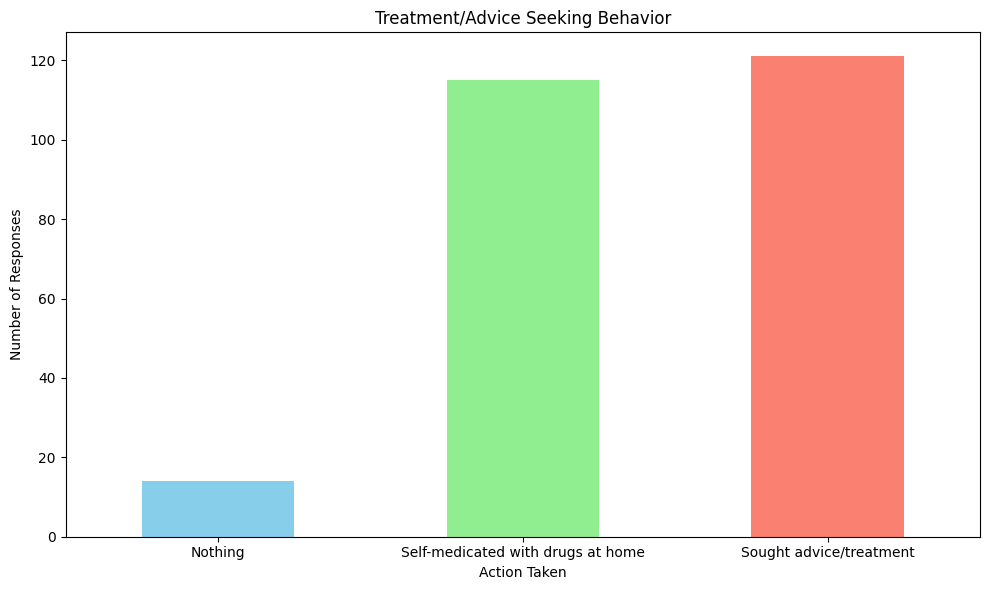

In [ ]:
import matplotlib.pyplot as plt
# Count the occurrences of 1 in each column
nothing_count = working_df['Nothing'].sum()
self_medicated_count = working_df['Self-medicated with drugs at home'].sum()
sought_advice_count = working_df['Sought advice/treatment'].sum()

# Create a dictionary to hold the counts
counts = {
    'Nothing': nothing_count,
    'Self-medicated with drugs at home': self_medicated_count,
    'Sought advice/treatment': sought_advice_count
}

# Convert the counts dictionary to a Series for easy plotting
counts_series = pd.Series(counts)

# Plot a bar chart
plt.figure(figsize=(10, 6))
counts_series.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Treatment/Advice Seeking Behavior')
plt.xlabel('Action Taken')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the graph
plt.show()

In [ ]:
print(working_df.isnull().sum())

sn                                     2
bi1                                    0
city                                   0
bi2                                    1
q401                                   0
q402                                   0
q403                                   0
Nothing                                0
Self-medicated with drugs at home      0
Sought advice/treatment                0
Others                                 0
q405b                                228
q406                                 196
q408                                 196
q409                                 225
q409i                                231
q409ii                               231
q409iii                              231
q410                                 196
q411a                                211
q411b                                213
dtype: int64


# **Question 406**
For question 406, we see that we 316 null data after checking the csv data manually as well, I can confirm that this seems correct, which means that out of the 359 responses, we should expect to see around 43 entries total for this question.

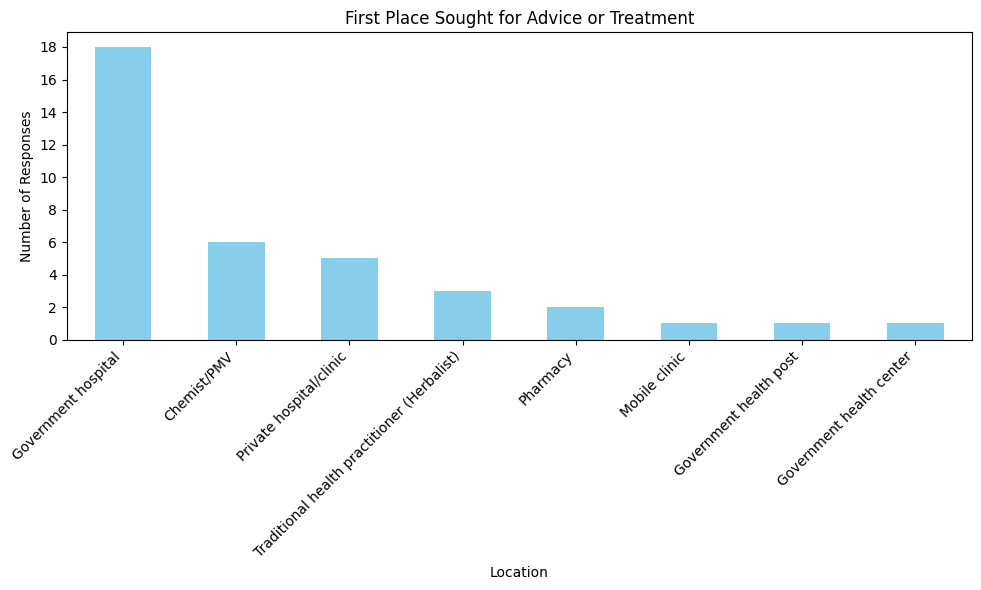

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Mapping for q406 values to names
q406_mapping = {
    1: 'Government hospital',
    2: 'Government health center',
    3: 'Government health post',
    4: 'Mobile clinic',
    5: 'Fieldworker/CHW',
    6: 'Other public sector',
    7: 'Private hospital/clinic',
    8: 'Pharmacy',
    9: 'Chemist/PMV',
    10: 'Private doctor',
    11: 'Mobile clinic',
    12: 'Private Laboratory',
    13: 'Other private medical sector',
    14: 'Shop',
    15: 'Traditional health practitioner (Herbalist)',
    16: 'Market',
    17: 'Drug peddler',
    18: 'Community-oriented resource person',
    19: 'Visited family friend/friend that is a health professional',
    20: 'Consulted a Spiritual Leader',
    21: 'Other'
}

# Replace the numerical values in q406 with their corresponding names
working_df['q406'] = working_df['q406'].map(q406_mapping)

# Count the occurrences of each value in q406
q406_counts = working_df['q406'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = q406_counts.plot(kind='bar', color='skyblue')
plt.title('First Place Sought for Advice or Treatment')
plt.xlabel('Location')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45, ha='right')

# Set the y-axis to show only whole numbers
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

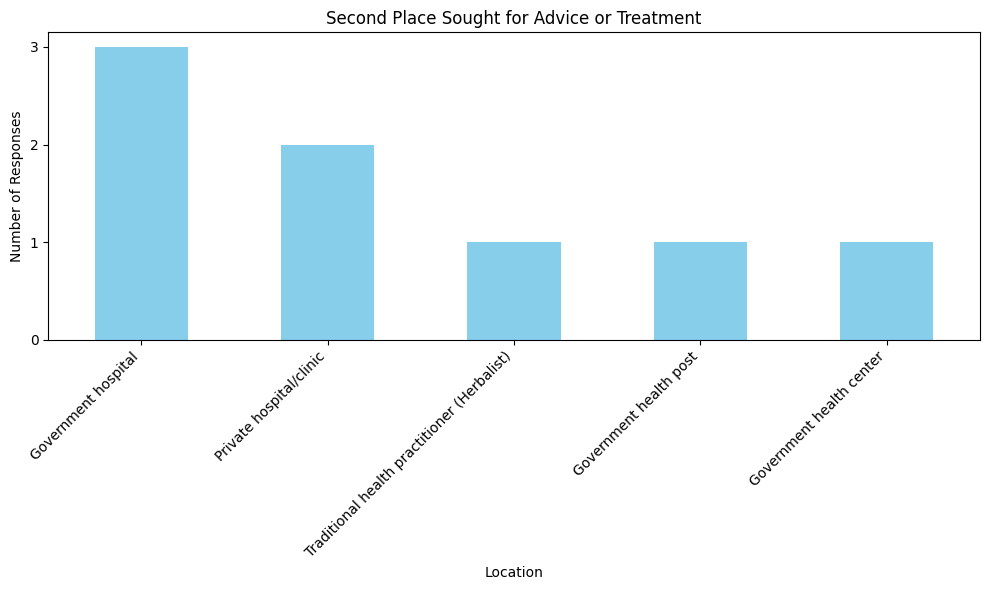

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Mapping for q409 values to names
q409_mapping = {
    1: 'Government hospital',
    2: 'Government health center',
    3: 'Government health post',
    4: 'Mobile clinic',
    5: 'Fieldworker/CHW',
    6: 'Other public sector',
    7: 'Private hospital/clinic',
    8: 'Pharmacy',
    9: 'Chemist/PMV',
    10: 'Private doctor',
    11: 'Mobile clinic',
    12: 'Private Laboratory',
    13: 'Other private medical sector',
    14: 'Shop',
    15: 'Traditional health practitioner (Herbalist)',
    16: 'Market',
    17: 'Drug peddler',
    18: 'Community-oriented resource person',
    19: 'Visited family friend/friend that is a health professional',
    20: 'Consulted a Spiritual Leader',
    21: 'Other'
}

# Replace the numerical values in q406 with their corresponding names
working_df['q409'] = working_df['q409'].map(q406_mapping)

# Count the occurrences of each value in q406
q409_counts = working_df['q409'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = q409_counts.plot(kind='bar', color='skyblue')
plt.title('Second Place Sought for Advice or Treatment')
plt.xlabel('Location')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45, ha='right')

# Set the y-axis to show only whole numbers
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

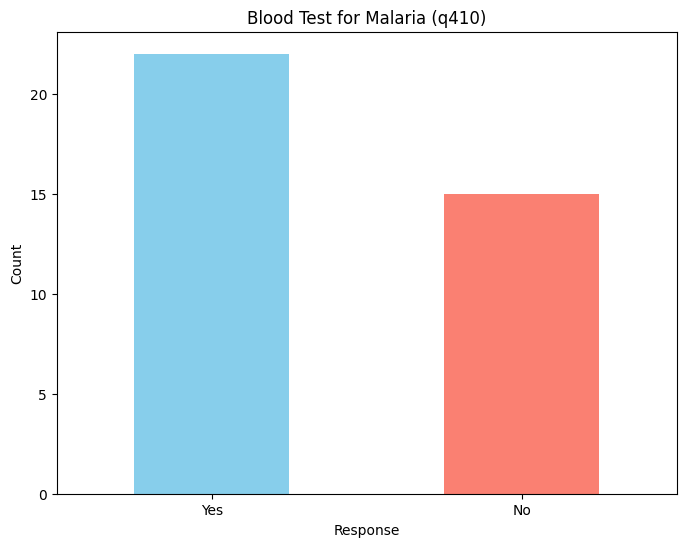

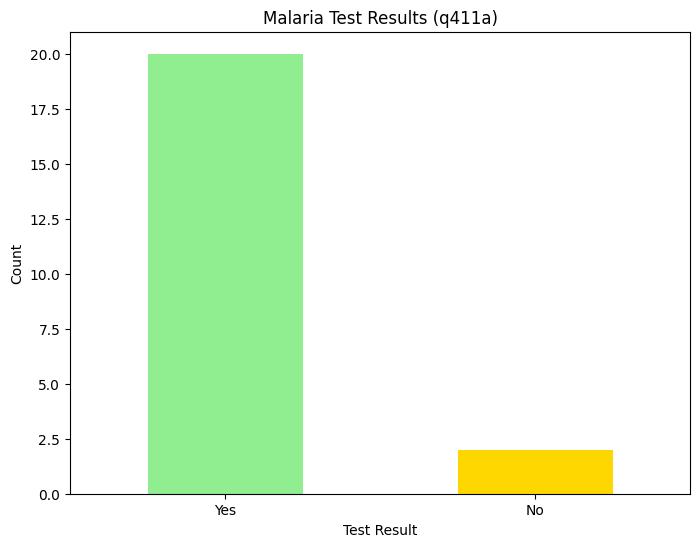

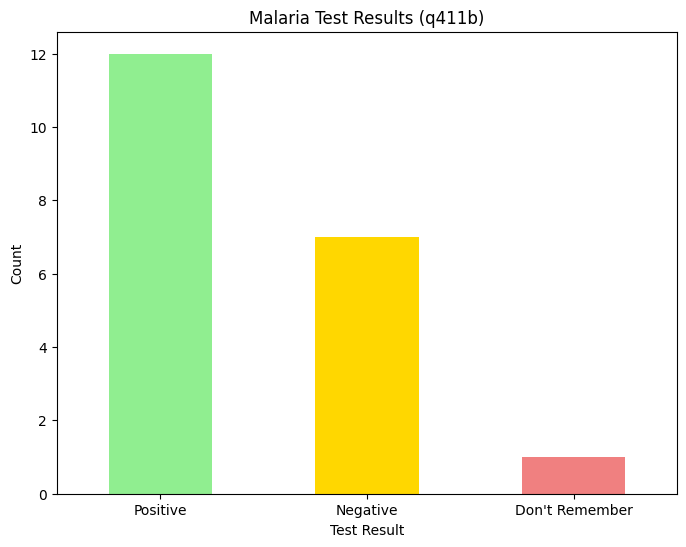

In [ ]:
import matplotlib.pyplot as plt

# Q410: Blood test for malaria
q410_counts = working_df['q410'].value_counts()

# Plotting Q410
plt.figure(figsize=(8, 6))
q410_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Blood Test for Malaria (q410)')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'], rotation=0)
plt.show()

# Q411: Test result
q411a_counts = working_df['q411a'].value_counts()

# Plotting Q411
plt.figure(figsize=(8, 6))
q411a_counts.plot(kind='bar', color=['lightgreen', 'gold', 'lightcoral'])
plt.title('Malaria Test Results (q411a)')
plt.xlabel('Test Result')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'], rotation=0)
plt.show()

# Q411b: Malaria diagnosis by a healthcare provider
q411b_counts = working_df['q411b'].value_counts()

# Plotting Q411b
plt.figure(figsize=(8, 6))
q411b_counts.plot(kind='bar', color=['lightgreen', 'gold', 'lightcoral'])
plt.title('Malaria Test Results (q411b)')
plt.xlabel('Test Result')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Positive', 'Negative', 'Don\'t Remember'], rotation=0)
plt.show()

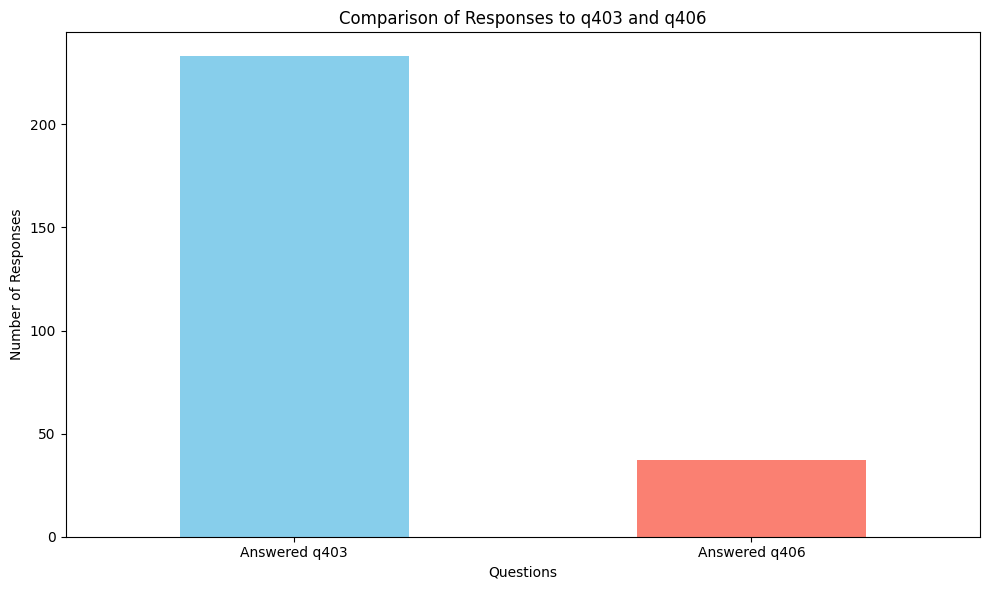

In [ ]:

# Count the total number of individuals who answered q403
total_q403 = working_df.shape[0]

# Count the number of individuals who also answered q406
answered_q406 = working_df['q406'].notna().sum()

# Create a dictionary to hold the counts
counts = {
    'Answered q403': total_q403,
    'Answered q406': answered_q406
}

# Convert the counts dictionary to a Series for easy plotting
counts_series = pd.Series(counts)

# Plot a bar chart
plt.figure(figsize=(10, 6))
counts_series.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Comparison of Responses to q403 and q406')
plt.xlabel('Questions')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the graph
plt.show()

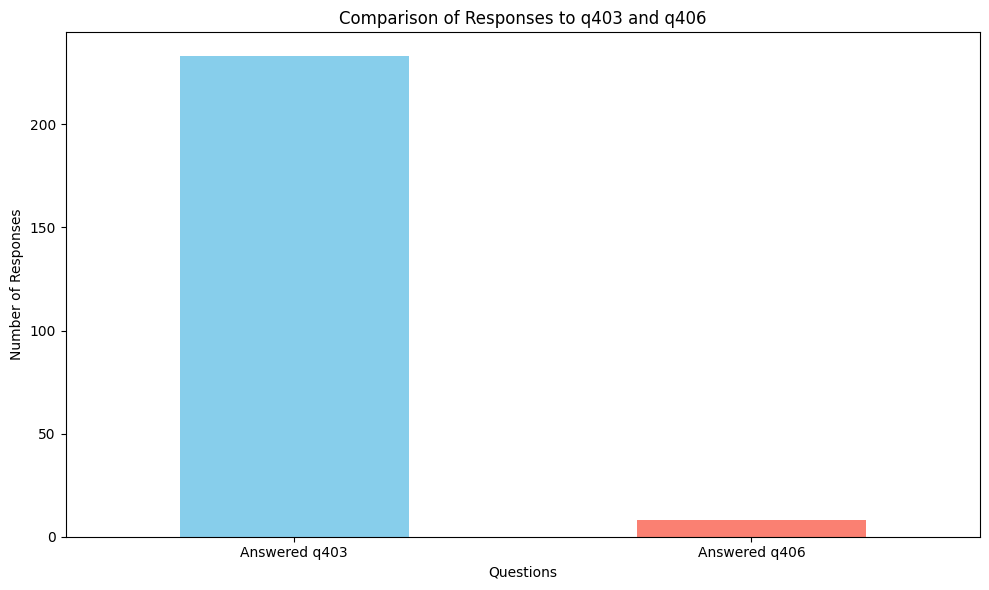

In [ ]:

# Count the total number of individuals who answered q403
total_q403 = working_df.shape[0]

# Count the number of individuals who also answered q406
answered_q406 = working_df['q409'].notna().sum()

# Create a dictionary to hold the counts
counts = {
    'Answered q403': total_q403,
    'Answered q406': answered_q406
}

# Convert the counts dictionary to a Series for easy plotting
counts_series = pd.Series(counts)

# Plot a bar chart
plt.figure(figsize=(10, 6))
counts_series.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Comparison of Responses to q403 and q406')
plt.xlabel('Questions')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the graph
plt.show()